# Assignment - A5.part2
### Devin Hall, Tyler Birnie
### Due: 4-22-22 @ 11:59pm
Some pre-requisites we will need for this project

### Question 1:
Confirm the results from Part1 Q2 using data table below. 
Python has the "mlxtend" library

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

_item_A = 'A'
_item_B = 'B'
_item_C = 'C'
_item_D = 'D'
_item_E = 'E'
_item_F = 'F'
_item_G = 'G'
_item_H = 'H'
_item_I = 'I'
_item_J = 'J'
_item_K = 'K'

transactions = [
    [_item_B, _item_D, _item_F, _item_G, _item_I, _item_J],
    [_item_C, _item_B, _item_D, _item_G, _item_I, _item_J],
    [_item_D, _item_F, _item_G, _item_H],
    [_item_A, _item_F, _item_G, _item_J, _item_K],
    [_item_A, _item_B, _item_D, _item_E, _item_G],
]

encoder = TransactionEncoder()
encoded = encoder.fit(transactions).transform(transactions)
df = pd.DataFrame(encoded, columns=encoder.columns_)
freq = apriori(df, max_len=2, use_colnames=True)
rules = association_rules(freq, metric='lift', min_threshold=.5).sort_values(['lift'], ascending=[True])
print(rules[['antecedents', 'consequents']])

### Question 2:
You will analyze a portion of the Instacart Online Grocery Shopping Dataset 2017. The 2 data sets you are given contains hust 20K or 500K items purchased, while the original data set has 3 million orders

You will only need to focuse on the following files: "order_products__train_small.csv", "order_products__train_med.csv" and "products.csv" for this analysis.

You can link the product number in the "order_products" file to the name of the product in the "products.csv" file.

#### Question 2A: 
Create a histogram showing the number of products per order for both the 'order_products__train_small.csv' and 'order_products__train_med.csv' data sets.

Indicate with a vertical line where the mean number of products per order lands. 

In [ ]:
DATA_ORDER_PRODUCTS_TRAIN_SMALL = pd.read_csv ('instacart-small/order_products__train_small.csv')
DATA_ORDER_PRODUCTS_TRAIN_MED = pd.read_csv ('instacart-small/orders_product__train_med.csv')

order2NumProducts = {

}

for i, order in DATA_ORDER_PRODUCTS_TRAIN_SMALL.iterrows():

    if order['order_id'] not in order2NumProducts:
        order2NumProducts[order['order_id']]  = 0

    order2NumProducts[order['order_id']] += 1

mean = sum(order2NumProducts.values())
mean /= len(order2NumProducts.values())

import matplotlib.pyplot as plt
plt.hist(x=order2NumProducts.values(), bins='auto')
plt.xlabel('Orders')
plt.ylabel('# Products')
plt.title('Products per order (Small)')
plt.axvline(x=mean, color='red')

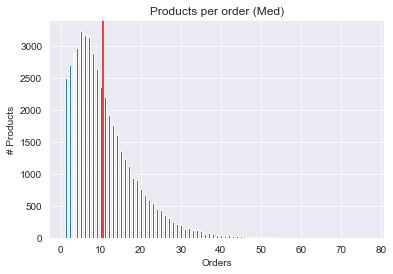

In [ ]:
order2NumProducts = {}
for i, order in DATA_ORDER_PRODUCTS_TRAIN_MED.iterrows():

    if order['order_id'] not in order2NumProducts:
        order2NumProducts[order['order_id']]  = 0

    order2NumProducts[order['order_id']] += 1

mean = sum(order2NumProducts.values())
mean /= len(order2NumProducts.values())

plt.hist(x=order2NumProducts.values(), bins='auto')
plt.xlabel('Orders')
plt.ylabel('# Products')
plt.title('Products per order (Med)')
plt.axvline(x=mean, color='red')

#### Question 2B:
For the 'order_products__train_small.csv' data, create a top 15 item frequency plot. 

plot the top 15 most frequently purchased items.

This should be a bar plot with items vs frequency (relative support) as the axis

<AxesSubplot:>

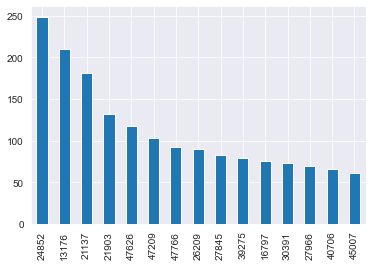

In [ ]:
DATA_ORDER_PRODUCTS_TRAIN_SMALL['product_id'].value_counts()[:15].plot(kind='bar')

#### Question 2C:
For the ‘order products train med.csv‘ data, create an top 15 item frequency plot, that is plot the top 15 most frequently purchased items. 

This should be a bar plot with items vs. frequency (relative support).

<AxesSubplot:>

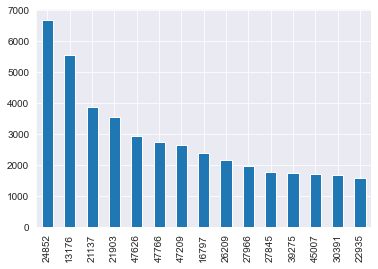

In [ ]:
DATA_ORDER_PRODUCTS_TRAIN_MED['product_id'].value_counts()[:15].plot(kind='bar')

#### Question 2D:
For the ‘order products train small.csv‘ data, use Apriori to find association rules with a minimum support of 0.003 and confidence of 0.5. 

Report in a table the top 10 rules (sorted by lift) with the product names, the support, confidence and lift.

In [ ]:
transactionIds = set()
transaction2Items = {}

for i, order in DATA_ORDER_PRODUCTS_TRAIN_SMALL.iterrows():
    transactionIds.add(order['order_id'])

for tranId in transactionIds:
    transaction2Items[tranId] = set()

for i, order in DATA_ORDER_PRODUCTS_TRAIN_SMALL.iterrows():
    transaction2Items[order['order_id']].add(str(order['product_id']))

keys = np.array(transaction2Items.keys())
orders = transaction2Items.values()

encoder = TransactionEncoder()
encoded = encoder.fit(orders).transform(orders)
df = pd.DataFrame(encoded, columns=encoder.columns_)

freq = apriori(df, min_support=.003, use_colnames=True)
rules = association_rules(freq, metric='lift', min_threshold=.5).sort_values(['lift'], ascending=[True])
rules[['support', 'confidence', 'lift']][:10]

,support,confidence,lift
584,0.004772,0.087379,0.661832
585,0.004772,0.036145,0.661832
608,0.003181,0.024096,0.745013
609,0.003181,0.098361,0.745013
577,0.003712,0.028112,0.869182
576,0.003712,0.114754,0.869182
9,0.003181,0.024096,1.009906
8,0.003181,0.133333,1.009906
603,0.003712,0.134615,1.019617
602,0.003712,0.028112,1.019617


#### Question 2E:
Rerun Apriori on the same data set with a minimum support of 0.0025 and
confidence of 0.5. 
Create a scatterplot of the rules, plotting support vs. confidence colored by lift value.

Text(0, 0.5, 'Confidence')

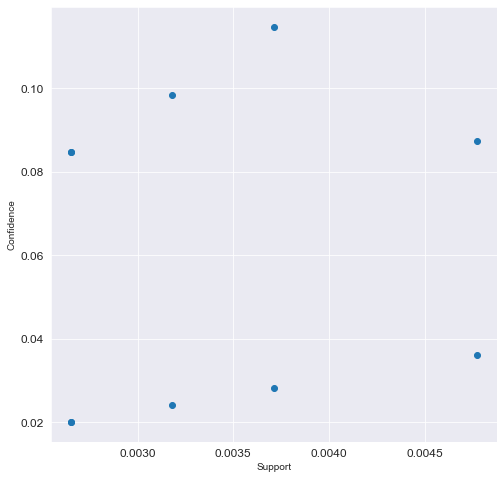

In [ ]:
transactionIds = set()
transaction2Items = {}

for i, order in DATA_ORDER_PRODUCTS_TRAIN_SMALL.iterrows():
    transactionIds.add(order['order_id'])

for tranId in transactionIds:
    transaction2Items[tranId] = set()

for i, order in DATA_ORDER_PRODUCTS_TRAIN_SMALL.iterrows():
    transaction2Items[order['order_id']].add(str(order['product_id']))

keys = np.array(transaction2Items.keys())
orders = transaction2Items.values()

encoder = TransactionEncoder()
encoded = encoder.fit(orders).transform(orders)
df = pd.DataFrame(encoded, columns=encoder.columns_)

freq = apriori(df, min_support=.0025, use_colnames=True)
rules = association_rules(freq, metric='lift', min_threshold=.5).sort_values(['lift'], ascending=[True])
to_plot = rules[['support', 'confidence', 'lift']][:10]



fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

plt.scatter(to_plot['support'], to_plot['confidence'])

plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('Support')
plt.ylabel('Confidence')


#### Question 2F: [Bonus]
For the ‘order products train med.csv‘ data, use Apriori to find as-
sociation rules with a minimum support of 0.003 and confidence of 0.5. 

Report in a table the top 10 rules (sorted by lift) with the product names, the support, confidence and lift.

In [ ]:
transactionIds = set()
transaction2Items = {}

for i, order in DATA_ORDER_PRODUCTS_TRAIN_MED.iterrows():
    transactionIds.add(order['order_id'])

for tranId in transactionIds:
    transaction2Items[tranId] = set()

for i, order in DATA_ORDER_PRODUCTS_TRAIN_MED.iterrows():
    transaction2Items[order['order_id']].add(str(order['product_id']))

keys = np.array(transaction2Items.keys())
orders = transaction2Items.values()

encoder = TransactionEncoder()
encoded = encoder.fit(orders).transform(orders)
df = pd.DataFrame(encoded, columns=encoder.columns_)

freq = apriori(df, min_support=.003, use_colnames=True)
rules = association_rules(freq, metric='lift', min_threshold=.5).sort_values(['lift'], ascending=[True])
rules[['support', 'confidence', 'lift']][:10]

KeyboardInterrupt: 